# 1- Importing the Dependencies

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score , classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# 2- Data Collection & Pre-Processing

In [13]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],index=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [15]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.fillna(' ',inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5168 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5168 non-null   object
 1   v2      5168 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


# 3- Label Encoding

    spam  -  0

    ham  -  1

In [23]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [24]:
df['v1_encoded'] = df['v1'].map({'ham':0, 'spam':1})

In [25]:
df['v1_encoded'].unique()

array([0, 1], dtype=int64)

In [26]:
df.sample(5)

,v1,v2,v1_encoded
3221,ham,"Hi, my love! How goes that day? Fuck, this mor...",0
597,spam,You have an important customer service announc...,1
2152,ham,Hi kindly give us back our documents which we ...,0
2303,ham,Should I tell my friend not to come round til ...,0
454,spam,"Loan for any purpose å£500 - å£75,000. Homeown...",1


# 4- Splitting the data into training data & test data

In [31]:
x = df['v2']
y = df['v1_encoded']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5168,)
(4134,)
(1034,)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5168 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5168 non-null   object
 1   v2          5168 non-null   object
 2   v1_encoded  5168 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.5+ KB



# 5- EDA : Explorator Data Analysi

    Visualizing Target Variable.


C:\Users\Eng. Ramez\AppData\Local\Temp\ipykernel_11576\88260148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set1')


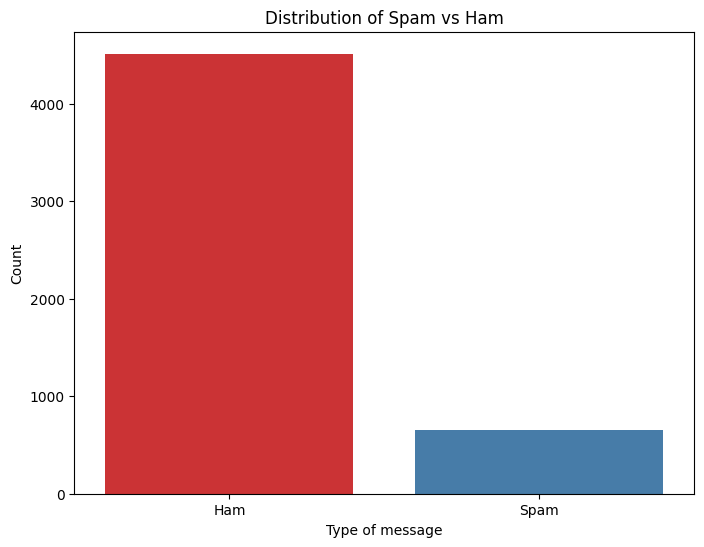

In [58]:
counts = y.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette='Set1')
plt.title('Distribution of Spam vs Ham')
plt.xlabel('Type of message')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# 5- Feature Extraction

In [35]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [38]:
x_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
X_train_features[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 7438)>

# 6- Training the Model

In [40]:
model = LogisticRegression()

model.fit(X_train_features,y_train)

LogisticRegression()

### Train data score

In [48]:
train_score = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, train_score)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9629898403483309


### Test data score

In [50]:
y_pred = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, y_pred)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9593810444874274


# 7- Evaluating the trained model

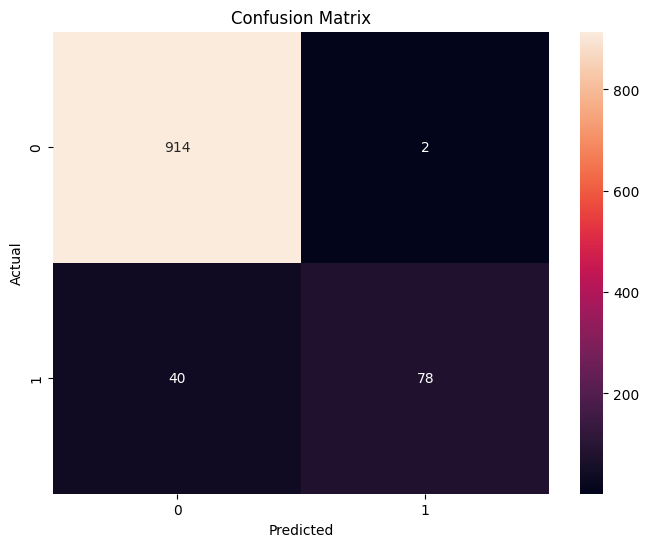

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       916
           1       0.97      0.66      0.79       118

    accuracy                           0.96      1034
   macro avg       0.97      0.83      0.88      1034
weighted avg       0.96      0.96      0.96      1034

